## Entrega 4
### Coeficient de fricció

[Coleman 2018](#bib_Coleman)

In [1]:
import numpy as np
import pandas as pd
import scipy
from scipy import stats
import matplotlib.pyplot as plt
from IPython.display import Math, display
import sympy as sp
from sympy.physics.units.systems import SI
from sympy.physics.units import meter, second, liter, hour, degree, convert_to
from sympy import sin, cos, pi, Abs

sp.init_printing()

def show(*args):
    out = ""
    for arg in args:
        if isinstance(arg, (sp.Expr, sp.Eq)):
            arg = sp.latex(arg)
        else:
            arg = str(arg)
        out += arg
    display(Math(out))
    
qq = "\quad "

## Coeficient de fricció
- Volem fer saber el coeficient de fricció sense haver de mesurar la caiguda de pressió
- Necessitem una precisió de l' 1% amb un 99% de nivell de confiança
- Per validar el model mesurem el coeficient de fricció indirectament amb mesures de pressió i flux
    - El manòmetre té una resolució de 10 Pa
    - El flowmeter té una resolució de 10 ml/s
    - Els paràmetres tabulats els coneixem amb una precisió d' 1/1000
- Quin és l'error del model?

### Paràmetres
- Densitat $\rho = 1 \,g/ml$
- Rugositat $\epsilon = \,1 cm$
- Diàmetre $d = \,15cm$
- Viscositat dinàmica $\mu = 1.2 \,mPa \cdot s$
- Llargària del tub $L = 1000 m$

In [2]:
# Model
from sympy.abc import rho, epsilon, mu, Q, L, d, f, X
DP = sp.Symbol('\Delta P')
Re, fS, fD = sp.symbols('Re f_S f_D')

P = f * 8 * rho * Q**2 * L / (sp.pi**2 * d**5)
show('\Delta P = ', P)

f = 1 / (-1.8 * sp.log(6.9 / Re + (epsilon/d/3.7)**1.11))**2
show('f = ', f)

Re = 4 * Q * rho / (sp.pi * mu * d)
show('Re =', Re)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Index(['Flow (l/s)', '\Delta P (Pa)'], dtype='object')


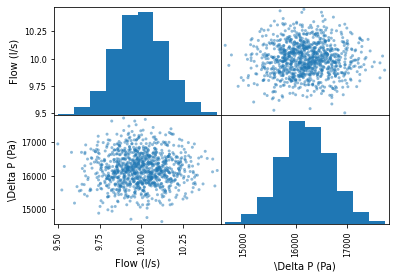

In [3]:
# Dades
data = pd.read_csv("../data/dp_data.csv")
print(data.columns)

l = pd.plotting.scatter_matrix(data[data.columns])

In [4]:
print(data.mean(), '\n', data.std())

Flow (l/s)           9.992599
\Delta P (Pa)    16201.240000
dtype: float64 
 Flow (l/s)         0.151722
\Delta P (Pa)    491.664720
dtype: float64


In [5]:
# Simulació
valors = {rho: 1000, epsilon: 0.01, mu: 1.2E-3, L: 1000, d: 0.15}

fS = X
show('f_S = ', fS.subs(valors))

<IPython.core.display.Math object>

In [6]:
# lfS = sp.lambdify()
# ffS = lfS(x_i)

# l = plt.hist(ffS)
# print(np.mean(ffS), np.std(ffS))

In [7]:
# Mesura
fD = X
show('f_D = ', fD.subs(valors))

<IPython.core.display.Math object>

In [8]:
# lfD = sp.lambdify()
# ffD = lfD(x_i)

#l = plt.hist(ffD)
#print(np.mean(ffD), np.std(ffD))

In [9]:
# Discrepància
S = X
D = X
E = S - D
# print(E)

# l = plt.hist(ffS, histtype='step')
# l = plt.hist(ffD, histtype='step')
# l = plt.legend(['simulació', 'dades'])

### Incerteses

$$E = S - D =  $$

$$u_v = \sqrt{u_n^2 + u_{p+D}^2}$$

- Desestimant l'incertesa numèrica

$$
\begin{align}
u_v^2 & = u_{p+D}^2\\
      & = \sum{\theta i^2  u_i^2}\\
      & = \sum{\theta i^2  x_i^2  ur_i^2}\\
\end{align}
$$

In [10]:
fE = fS - fD
fE

In [11]:
# Derivades parcials
mesures = {}
SX = sp.diff(fE, X).subs(valors).subs(mesures).n()
show(SX, qq,
)

<IPython.core.display.Math object>

In [12]:
# Incertesa dels paràmetres al quadrat
uX = 0
up2 = np.sum(np.power([
    SX * uX,
], 2))

In [13]:
# Incertesa de l'estimació de la discrepància
uV = np.sqrt(float(up2))
show("u_V = %0.4f" % uV)

<IPython.core.display.Math object>

In [14]:
# Discrepància
show("E = %0.4f \pm %0.4f Pa" % (E, uV))

<IPython.core.display.Math object>

In [15]:
# Error relatiu del model
ur = E/S
show("ur_E = %0.3f" % ur)

<IPython.core.display.Math object>

In [16]:
# Nivell de confiança per un error del 5%
#t = 0.05 / ur
#l, h = stats.t.cdf([-t, t], 1000)
#CL = h - l
#show("CL = %0.2f" % CL)

# Referències

- <a id='bib_Edwards'></a> Edwards, D., **2001**. *Guide to mathematical modelling*. Palgrave, Basingstoke.
- <a id='bib_Coleman'></a> Coleman, Hugh W. & Steele, W. Glenn, **2018**. *Experimentation, validation, and uncertainty analysis for engineers*. Wiley.

Copyright (C) 2022 Gabriel Jover Mañas

    Permission is granted to copy, distribute and/or modify this document
    under the terms of the GNU Free Documentation License, Version 1.3
    or any later version published by the Free Software Foundation;
    with no Invariant Sections, no Front-Cover Texts, and no Back-Cover Texts.
    A copy of the license is included in the section entitled "GNU
    Free Documentation License".

![GFDL][GFDL]

    This program is free software: you can redistribute it and/or modify
    it under the terms of the GNU General Public License as published by
    the Free Software Foundation, either version 3 of the License, or
    (at your option) any later version.

    This program is distributed in the hope that it will be useful,
    but WITHOUT ANY WARRANTY; without even the implied warranty of
    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
    GNU General Public License for more details.

    You should have received a copy of the GNU General Public License
    along with this program.  If not, see <https://www.gnu.org/licenses/>.

![GPL3][GPL3]

[GFDL]: https://www.gnu.org/graphics/gfdl-logo.svg
[GPL3]: https://www.gnu.org/graphics/gplv3-or-later.svg